<a href="https://colab.research.google.com/github/MittalMonika/DataScience/blob/master/fruadcreditcarddetection_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time
import os


#plotting
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc, precision_recall_curve


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#os.listdir('/kaggle/input/')
#To read csv File from locally stored file
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("Credit Card Fraud Detection data Information", "rows:" ,df.shape[0], " coulmns :" , df.shape[1])
df.info()


Credit Card Fraud Detection data Information rows: 284807  coulmns : 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807

In [6]:
# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, recall_score, f1_score,confusion_matrix, classification_report
def evaluate_metrics(y_test,y_pred):
    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    #classification = classification_report(y_test, y_pred)
    print("Accuracy:  {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format( f1))
    print("ROC : {:.3f}".format(roc))
    #print("Classification_report :")
    #print(classification)
    #return(accuracy,precision,recall,f1,roc,classification)
    return(accuracy,precision,recall,f1,roc)



# plot the confusion matrix as a heatmap
def Plot_confusion_matrix(y_test, y_pred):
  plt.figure(figsize=(3,3))
  cm = confusion_matrix(y_test, y_pred)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
  classNames = ['NonFraud','Fraud']
  plt.title('Confusion Matrix ')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=0,ha='left')
  plt.yticks(tick_marks, classNames,rotation=90, ha='left')
  s = [['TN','FP'], ['FN', 'TP']]
  plt.show()
  #for i in range(2):
  #    for j in range(2):
  #        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  #plt.show()

def impfeatures(model):
    plt.figure(figsize=(6,3))
    fimp = model.feature_importances_
    indices = np.argsort(fimp)[::-1]
    sorted_features = np.array([Xval[i] for i in range(len(Xval))])[indices]

    #plot sorted feature importance
    plt.bar(sorted_features, fimp[indices])
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.show()

In [ ]:
#Neural Network

In [9]:
#Neural Networks implementation
import keras
print(keras.__version__)
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.constraints import maxnorm
#from keras.utils.vis_utils import plot_model

import warnings
#warnings.filterwarnings('ignore')

print('Imported successfully')

2.13.1
Imported successfully


#splitting of dataset before overfitting is better as our test dataset will be ore close to real world problem.

In [10]:
from sklearn.preprocessing import RobustScaler
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
X['Std_Amount'] = Rob_scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Std_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.670579


In [11]:
X = X.drop(["Time","Amount"], axis = 1)
#drop Amount and move Std_Amount at index '0'
#creditcard_data = creditcard_data.drop('Amount',axis=1)

Std_Amount = X['Std_Amount']
X.drop('Std_Amount', axis=1, inplace=True)
X.insert(0, 'Std_Amount', Std_Amount)
X.head()


,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [12]:
X

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,0.038986,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,0.641096,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.167680,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [13]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index1, test_index in sss1.split(X, y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = y.iloc[train_index1], y.iloc[test_index]

#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in sss2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = Xtrain.iloc[train_index2], Xtrain.iloc[val_index]
    Ytrain_final, Yval = Ytrain.iloc[train_index2], Ytrain.iloc[val_index]


Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
Train: [186996 144807  69756 ... 195673 152135 100500] Validation: [214502 127768  18878 ...  45194 143895 114668]
Train: [203609 160516 170008 ... 168236  40608 156569] Validation: [152253  33885 217198 ... 219379 125093 195120]
Train: [166473 135845 190847 ... 114436 217810 119523] Validation: [135986 136793 153361 ... 221564 222657 122137]
Train: [ 16294 187750  97608 ... 157188 191303 201639] Validation: [125168  42557 218854 ... 117014  95701  40

In [14]:
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.99827367 0.00172633]
[0.99827955 0.00172045]
[0.998262 0.001738]


In [15]:
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)



(170883, 29)
(170883,)
(56962, 29)
(56962,)
(56962, 29)
(56962,)


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

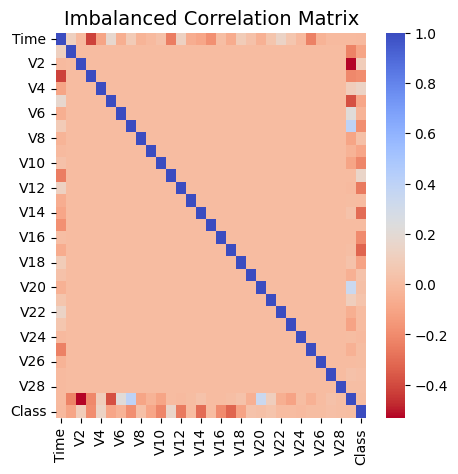

In [ ]:
f, ax1 = plt.subplots(figsize=(5,5))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# ADASYN

(Adaptive Synthetic Sampling):adapts the generation of synthetic samples based on the level of difficulty or imbalance in the dataset.
It focuses more on generating synthetic samples for minority class examples that are more challenging to classify by assigning different weights to different minority class samples based on their difficulty levels.

It assesses the difficulty of classifying this sample based on the local density of minority and majority class samples around it. If the sample is in a region of high overlap with the majority class, ADASYN assigns a higher weight to it, indicating that it's a more challenging example.

More synthetic samples are generated for minority class samples with higher weights. The number of synthetic samples is determined based on the local density and the oversampling ratio

In [47]:
from imblearn.over_sampling import ADASYN
from collections import Counter
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled= ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))


Resampled dataset shape Counter({0: 170588, 1: 170569})
Shape of X_adasampled: (341157, 29)
Shape of Y_adasampled: (341157,)


In [53]:
smote = SMOTE(random_state=42)
X_adasampled, Y_adasampled = smote.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({0: 170588, 1: 170588})
Shape of X_adasampled: (341176, 29)
Shape of Y_adasampled: (341176,)


(-10.0, 60.0)

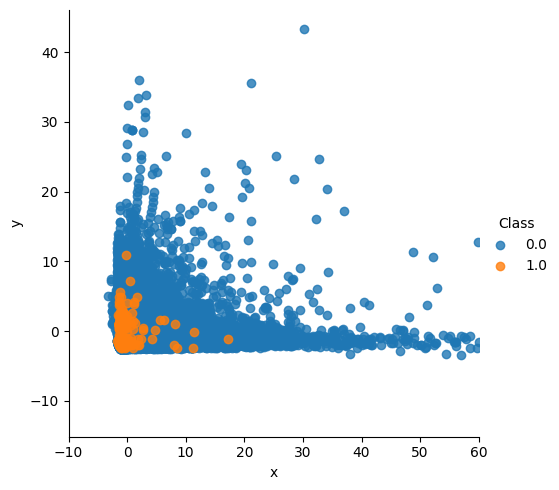

In [50]:

from sklearn.decomposition import PCA
#visualizing balanced train dataset
pca= PCA(n_components=2)
X_df= pd.DataFrame(Xtrain_final)
Y_df= pd.DataFrame(Ytrain_final)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')
plt.xlim(-10, 60)

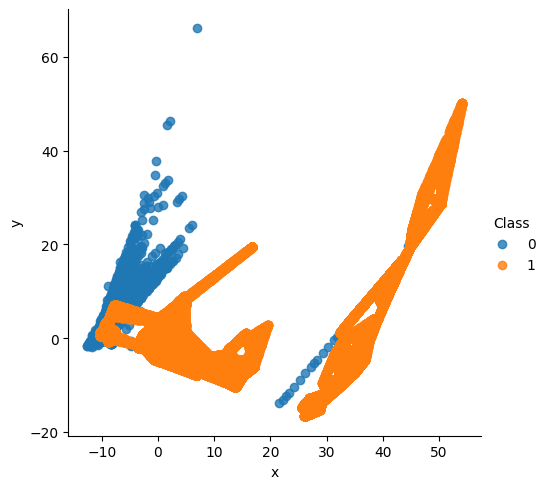

In [45]:
from sklearn.decomposition import PCA
#visualizing balanced train dataset
pca= PCA(n_components=2)
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

In [24]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.294977  1.356890  0.346789 -0.271670  0.360276  0.344626 -0.263433   
1   -0.255851 -0.854270  0.550652  0.557611 -3.415242 -0.165497 -0.682246   
2    0.333962 -0.244142 -0.178994  2.509673 -1.038460 -1.644473 -0.494259   
3    0.055754  1.262985  0.011126  0.034133  0.110327 -0.520404 -1.355532   
4    2.033396  1.643320 -1.251387 -1.524503 -0.402268  1.361731  4.108418   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0  0.080864 -0.135014  0.072354  ...  0.327045 -0.013433 -0.375931 -1.056880   
1  0.140759  0.615372  1.123241  ... -0.248410 -0.236063 -0.096293 -0.310438   
2 -0.487711  0.074377 -0.840251  ... -1.165197 -0.300535 -0.045586  0.288856   
3  0.217091 -0.216161  0.211051  ...  0.286311 -0.155154 -0.453968 -1.494221   
4 -1.265495  1.098343  1.135560  ... -0.559710  0.210050  0.117762  0.019884   

        V23       V24       V25       V26       V27     

In [25]:
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.294977,1.356890,0.346789,-0.271670,0.360276,0.344626,-0.263433,0.080864,-0.135014,0.072354,...,-0.013433,-0.375931,-1.056880,-0.047380,-1.046893,0.415828,0.180086,-0.022312,0.017266,0
1,-0.255851,-0.854270,0.550652,0.557611,-3.415242,-0.165497,-0.682246,0.140759,0.615372,1.123241,...,-0.236063,-0.096293,-0.310438,0.087277,0.717645,-0.513102,-0.852664,0.270731,0.170740,0
2,0.333962,-0.244142,-0.178994,2.509673,-1.038460,-1.644473,-0.494259,-0.487711,0.074377,-0.840251,...,-0.300535,-0.045586,0.288856,0.070394,0.757928,-0.493567,1.052600,0.012165,0.039401,0
3,0.055754,1.262985,0.011126,0.034133,0.110327,-0.520404,-1.355532,0.217091,-0.216161,0.211051,...,-0.155154,-0.453968,-1.494221,0.215026,0.356179,0.030698,0.626236,-0.116721,0.003064,0
4,2.033396,1.643320,-1.251387,-1.524503,-0.402268,1.361731,4.108418,-1.265495,1.098343,1.135560,...,0.210050,0.117762,0.019884,0.214769,0.718698,-0.557546,0.171553,-0.001962,-0.012478,0


Text(0.5, 1.0, 'balanced Correlation Matrix')

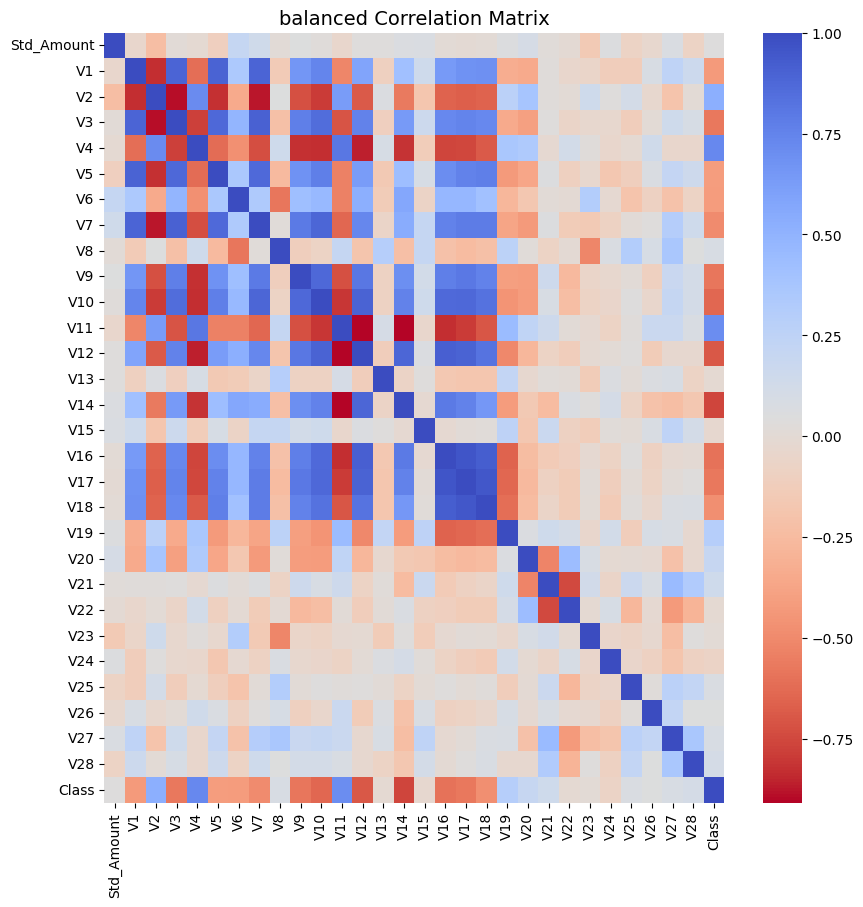

In [26]:
f, ax1 = plt.subplots(figsize=(10,10))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("balanced Correlation Matrix", fontsize=14)

In [27]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=df['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()


In [54]:
#Converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

In [55]:
Yval.unique()
Ytest.unique()
Y_adasampled.unique()

array([0, 1])

In [ ]:
from sklearn.metrics import f1_score
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='min', restore_best_weights= True)
for i in range(0,100):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    First_Model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40,callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred = First_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_pred = (Y_first_pred > 0.67).astype(int)
    f_score= f1_score(Ytest,Y_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))

KeyboardInterrupt: ignored

In [ ]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
optimizer = Adam(learning_rate=0.001)
Model1.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
488/488 - 2s - loss: 0.1987 - accuracy: 0.9252 - val_loss: 0.0945 - val_accuracy: 0.9698 - 2s/epoch - 4ms/step
Epoch 2/30
488/488 - 1s - loss: 0.0604 - accuracy: 0.9869 - val_loss: 0.0508 - val_accuracy: 0.9823 - 1s/epoch - 2ms/step
Epoch 3/30
488/488 - 1s - loss: 0.0337 - accuracy: 0.9929 - val_loss: 0.0328 - val_accuracy: 0.9887 - 1s/epoch - 2ms/step
Epoch 4/30
488/488 - 1s - loss: 0.0223 - accuracy: 0.9953 - val_loss: 0.0244 - val_a

In [ ]:
Y_pred_cls = Model1.predict(Xtest_arr, batch_size=200, verbose=0)
Y_pred = (Y_pred_cls > 0.5).astype(int)
print('Accuracy Model1 (Dropout): '+ str(Model1.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred)))

1781/1781 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9974
Accuracy Model1 (Dropout): 0.997401773929596
Recall_score: 0.8163265306122449
Precision_score: 0.38095238095238093
F-score: 0.5194805194805195


In [ ]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))


Model1_drop.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 65)                1950      
                                                                 
 dropout_24 (Dropout)        (None, 65)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 66        
                                                                 
Total params: 2016 (7.88 KB)
Trainable params: 2016 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
488/488 - 3s - loss: 0.3373 - accuracy: 0.8643 - val_loss: 0.1294 - val_accuracy: 0.9584 - 3s/epoch - 6ms/step
Epoch 2/40
488/488 - 2s - loss: 0.1347 - accuracy: 0.9567 - val_loss: 0.0744 - val_accuracy: 0.9738 - 2s/epoch - 3ms/step
Epoch 3/40
488/488 - 2s - loss: 0.0866 - 

In [38]:

#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
optimizer = Adam(learning_rate=0.001)
Model1_drop.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Model1_drop.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65)                1950      
                                                                 
 dropout_1 (Dropout)         (None, 65)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2016 (7.88 KB)
Trainable params: 2016 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
488/488 - 5s - loss: 0.2151 - accuracy: 0.9109 - val_loss: 0.0573 - val_accuracy: 0.9875 - 5s/epoch - 11ms/step
Epoch 2/40
488/488 - 2s - loss: 0.0874 - accuracy: 0.9672 - val_loss: 0.0407 - val_accuracy: 0.9889 - 2s/epoch - 3ms/step
Epoch 3/40
488/488 - 2s - loss: 0.0647 - 

1781/1781 [==============================] - 5s 3ms/step - loss: 0.0118 - accuracy: 0.9975
Accuracy Model1 (Dropout): 0.9975070953369141
Recall_score: 0.826530612244898
Precision_score: 0.6694214876033058
F-score: 0.7397260273972602


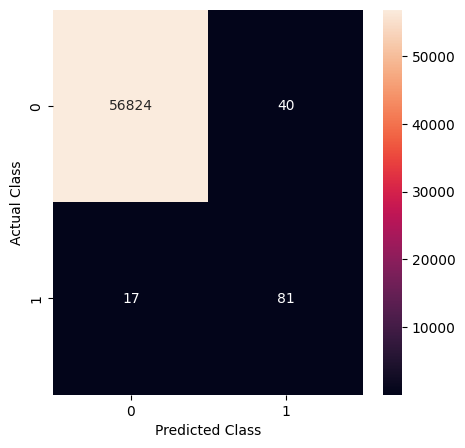

In [42]:
Y_pred_cls1 = Model1_drop.predict(Xtest_arr, batch_size=200, verbose=0)
Y_pred = (Y_pred_cls1 > 0.85).astype(int)
print('Accuracy Model1 (Dropout): '+ str(Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred)))
conf_matrix(Y_pred)

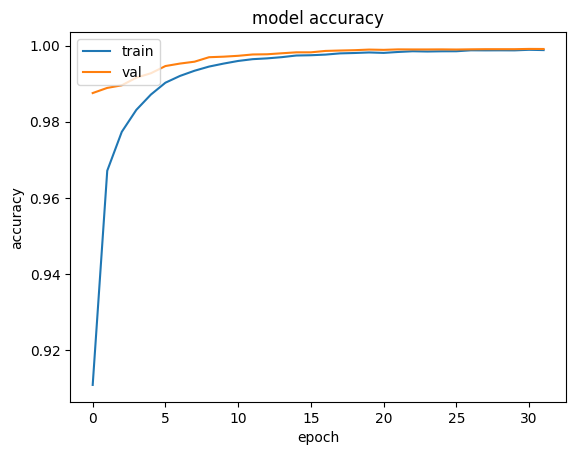

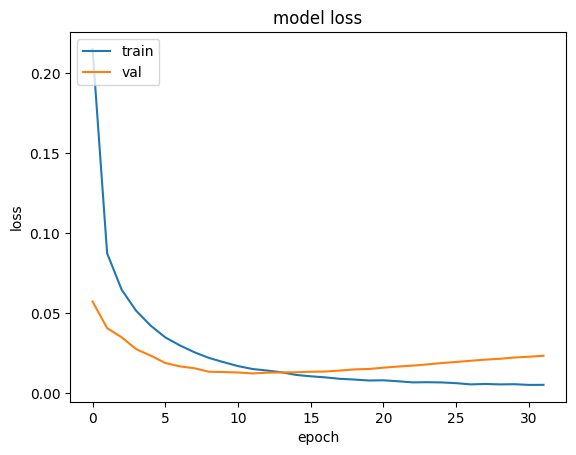

In [40]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

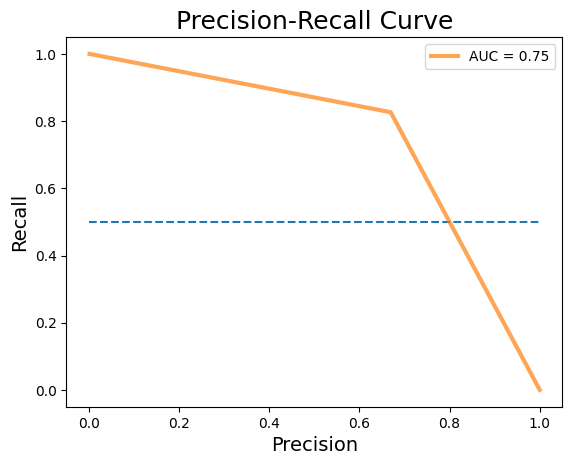

In [51]:
#Calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

AttributeError: ignored

In [ ]:
optimizer = Adam(learning_rate=0.001)
First_Model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
f_scorelist1=[]

# n_inputs = X_adasampled.shape[1]
# es= keras.callbacks.EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=2,
#                               verbose=0, mode='min', restore_best_weights= True)
# for i in range(0,100):
#     First_Model = Sequential()
#     First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
#     First_Model.add(Dropout(0.5))
#     First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#     First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#     First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
#     Y_first_pred = First_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)

#     f_score= f1_score(Ytest_arr,Y_first_pred)
#     f_scorelist1.append(f_score)

# print(f_scorelist1)
# print('FScore Mean: '+ str(np.mean(f_scorelist1)))

In [ ]:
pd.DataFrame(Y_pred).value_counts()

0    56496
1      466
dtype: int64

In [56]:
#Training Multi-layer perceptron with 2 hidden layers
def model_nueralnetwork():
  es= keras.callbacks.EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=2,
                                verbose=0, mode='min', restore_best_weights= True)
  Model2 = Sequential()
  Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
  Model2.add(Dropout(0.5))
  Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
  Model2.add(Dropout(0.5))
  Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

  Model2.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

  his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
  print(his_mod2.history.keys())
  return Model2

In [ ]:
#Y_pred_cls1 = Model2.predict(Xtest_arr, batch_size=200, verbose=0)
#Y_pred = (Y_pred_cls1 > 0.5).astype(int)
#print('Accuracy Model1 (Dropout): '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
#print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred)))
#print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred)))
#print('F-score: ' + str(f1_score(Ytest_arr,Y_pred)))

In [60]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import itertools

#def model_nueralnetwork():
#    return model
#n_inputs = X_adasampled.shape[1]
#model =  model_nueralnetwork()

def predict_with_model(model, X_test):
    """Use the specified model to make predictions on the test set."""
    return model.predict(Xtest, batch_size=200, verbose=0)

def compute_metrics(y_test, y_pred, y_pred_proba):
    """Compute the evaluation metrics for the predictions."""
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred_proba)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_proba)
    r2 = r2_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    return precision, recall, f1, accuracy, mse, rmse, mae, r2, fpr, tpr, thresholds, roc_auc

def adjust_threshold(y_test, y_pred_proba, initial_threshold=0.5, target_recall=0.9):
    """Adjust the prediction threshold to increase recall while maintaining good precision."""
    threshold = initial_threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    precision, recall, _, _, _, _, _, _, _, _, _, _ = compute_metrics(y_test, y_pred, y_pred_proba)
    while recall < target_recall:
        threshold += 0.01
        y_pred = (y_pred_proba >= threshold).astype(int)
        precision, recall, _, _, _, _, _, _, _, _, _, _ = compute_metrics(y_test, y_pred, y_pred_proba)
    return threshold, precision, recall

In [ ]:
model = model_nueralnetwork()
Y_pred = predict_with_model(model, Xtest_arr)
y_pred_proba = predict_with_model(model, Xtest_arr)
y_pred = (y_pred_proba >= 0.42).astype(int)
precision, recall, f1, accuracy, mse, rmse, mae, r2, fpr, tpr, thresholds, roc_auc = compute_metrics(Ytest_arr, y_pred ,y_pred_proba)
# Print evaluation metrics
print(f'---------------------- Before adjusting the threshold ----------------------')
print()
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2 score: {r2:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


In [ ]:


# Adjusting the threshold.
threshold, precision, recall = adjust_threshold(Ytest_arr, y_pred_proba, initial_threshold=0.5, target_recall=0.9)
y_pred = (y_pred_proba >= threshold).astype(int)
# Recalculate the evaluation metrics.
precision, recall, f1, accuracy, mse, rmse, mae, r2, fpr, tpr, thresholds, roc_auc = compute_metrics(Ytest_arr, y_pred, y_pred_proba)

# Print evaluation metrics
print(f'---------------------- After adjusting the threshold ----------------------')
print()
print('The new threshold is {:.2f}'.format(threshold))
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2 score: {r2:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Confusion matrix.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin